In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np
%matplotlib inline

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [4]:
data.head()

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0


In [8]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [9]:
clf

DecisionTreeClassifier(criterion='entropy')

In [12]:
X = data[['X_1','X_2']]
y = data.Y

In [13]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

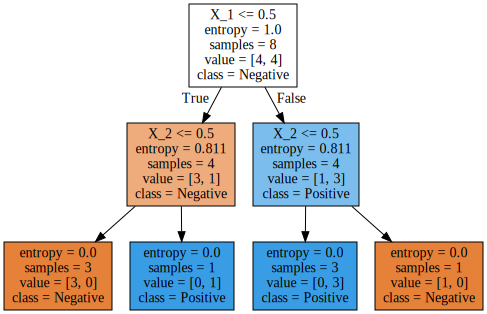

In [14]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))

display(SVG(graph.pipe(format='svg')))

## Dogs/Katzen

In [18]:
dogs = pd.read_csv('.\dogs.csv', index_col = 0)

In [24]:
dogs.head()

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик


In [20]:
katzen = pd.read_csv('.\cats.csv', index_col = 0)

In [26]:
katzen.head(10)

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


### E=−∑ i p_i * log_2(p_i)

In [59]:
E_sh_sob=(1/1)*np.log2((1/1)) - 0
E_sh_kot=np.round(-(4/9)*np.log2((4/9)) - (5/9)*np.log2((5/9)),2)
E_gav_sob=0 - (5/5)*np.log2((5/5))
E_gav_kot=np.round(-(4/5)*np.log2((4/5)) - (1/5)*np.log2((1/5)),2)
E_laz_sob=0 - (6/6)*np.log2((6/6))
E_laz_kot=-(4/4)*np.log2((4/4)) - 0

In [60]:
E_sh_sob

0.0

In [61]:
E_sh_kot

0.99

In [62]:
E_gav_sob

0.0

In [63]:
E_gav_kot

0.72

In [64]:
E_laz_sob

0.0

In [65]:
E_laz_kot

-0.0

In [82]:
parent_node = np.round(-(4/10)*np.log2((4/10)) - (6/10)*np.log2((6/10)), 2)

In [83]:
parent_node

0.97

In [78]:
np.round(parent_node - (1/10)*E_sh_sob - (9/10)*E_sh_kot, 2)

0.08

In [79]:
np.round(parent_node - (5/10)*E_gav_sob - (5/10)*E_gav_kot, 2)

0.61

In [81]:
np.round(parent_node - (4/10)*E_laz_sob - (6/10)*E_laz_kot, 2)

0.97